In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram
from IBMQuantumExperience.IBMQuantumExperience import IBMQuantumExperience
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from math import *

{'1101': 1024}


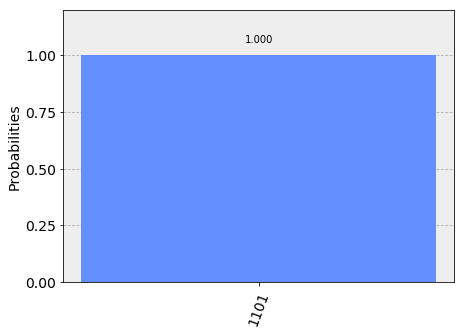

In [2]:
qx = QuantumRegister(4)
qy = QuantumRegister(1)
c = ClassicalRegister(4, "c")
qc = QuantumCircuit(qx, qy, c, name="oracle1")

qc.h(qx)

qc.x(qy)
qc.h(qy)

# oracle temp = q[4]
qc.cx(qx[0],qy)
qc.cx(qx[2],qy)
qc.cx(qx[3],qy)

qc.barrier()

qc.h(qx)
qc.h(qy)

qc.barrier()

qc.measure(qx, c)

backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts  = result.get_counts(qc)
print(counts)
plot_histogram(counts)

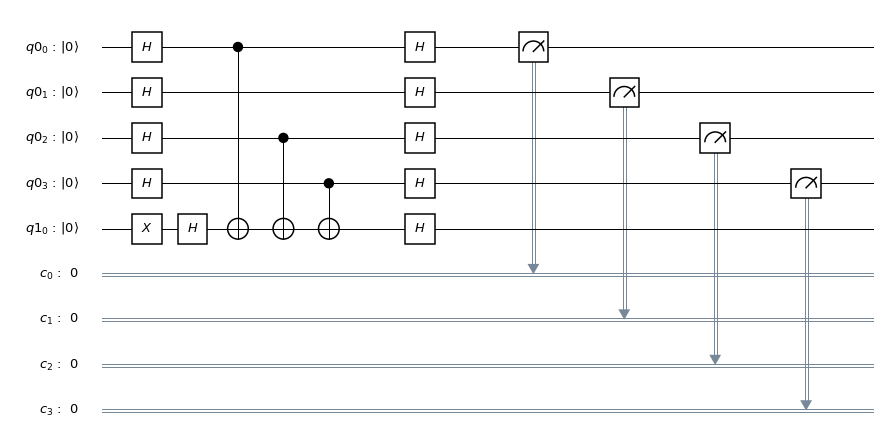

In [3]:
qc.draw(output='mpl', plot_barriers=False)

In [4]:
token = open("../ibm_token.txt","r").read().strip()
IBMQ.enable_account(token)

In [6]:
shots = 1024

provider = IBMQ.get_provider()
print(provider.backends())
backend  = provider.get_backend('ibmq_athens')

job_exp = execute(qc, backend=backend, shots=shots)
job_monitor(job_exp)

Job Status: job has successfully run


In [7]:
result_exp = job_exp.result()
print(result_exp)

Result(backend_name='ibmqx4', backend_version='1.3.0', date=datetime.datetime(2019, 7, 7, 21, 28, 18, tzinfo=tzutc()), execution_id='1b539990-a0fe-11e9-b55a-305a3a7b72bd', header=Obj(backend_name='ibmqx4', backend_version='1.0.0'), job_id='unknown', qobj_id='25661767-12f0-4ca6-8845-9f09dae91325', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=44, 0x1=74, 0x2=21, 0x3=33, 0x4=34, 0x5=63, 0x6=34, 0x7=40, 0x8=56, 0x9=74, 0xA=24, 0xB=40, 0xC=103, 0xD=204, 0xE=77, 0xF=103)), header=Obj(clbit_labels=[['c', 0], ['c', 1], ['c', 2], ['c', 3]], creg_sizes=[['c', 4]], memory_slots=4, n_qubits=5, name='oracle1', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), meas_level=2, shots=1024, success=True)], status='Successful completion', success=True)


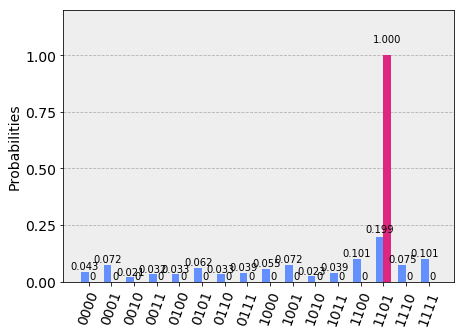

In [8]:
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts])

In [ ]:
jobID = job_exp.job_id()
print('JOB ID: {}'.format(jobID))

In [57]:
#job_get=backend.retrieve_job(jobID)
#job_get.result().get_counts(qc)

In [58]:
api = IBMQuantumExperience(token)
api.get_my_credits()

{'maxUserType': 15, 'promotional': 0, 'remaining': 15}

In [8]:
#api.get_last_codes()

In [33]:
print(qc.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q18[4];
qreg q19[1];
creg c[4];
h q18[0];
h q18[1];
h q18[2];
h q18[3];
x q19[0];
h q19[0];
cx q18[0],q19[0];
cx q18[2],q19[0];
cx q18[3],q19[0];
barrier q18[0],q18[1],q18[2],q18[3],q19[0];
h q18[0];
h q18[1];
h q18[2];
h q18[3];
h q19[0];
barrier q18[0],q18[1],q18[2],q18[3],q19[0];
measure q18[0] -> c[0];
measure q18[1] -> c[1];
measure q18[2] -> c[2];
measure q18[3] -> c[3];

